# MNIST machine learning exercise

In this exercise we will demonstrate the use of Keras and Keras Tune to identify a feedforward neural network that best predicts the a handwritten digit. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

# 1.0 Load and explore data (shouldn't need any transformations)

For repeatability, set random seed for both numpy and tensorflow.

In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(1)
tf.random.set_seed(1)

Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
from sklearn import datasets

mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

Notice that the dataset is stored in a Bunch type (see sklearn https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)

We can view this dataset as similar to a dictionary; we can look at all the keys by doing the following:

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

If we want the number of images, we can use the len function.

In [7]:
print(len(mnist.data))

1797


And, for each image we have a target value

In [8]:
print(len(mnist.target))

1797


To identify any issues with data imbalance, let's look at the number of observations for each digit 

In [9]:
import collections

counts = collections.Counter(mnist.target)
counts

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

We can also look at this as a barplot to visualize the data balance...

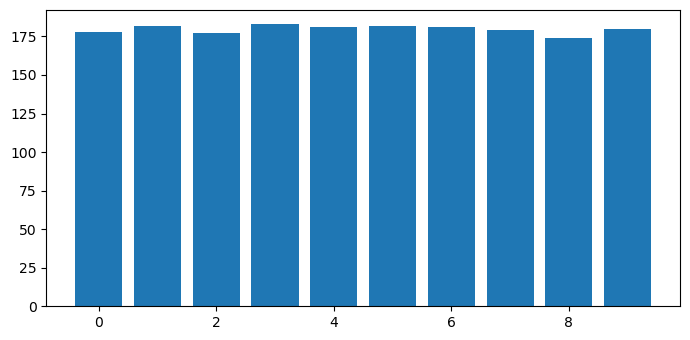

In [10]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(counts.keys(), counts.values())

# Display the plot
plt.show()

We can use matplotlib to display a sample of these images from the data.

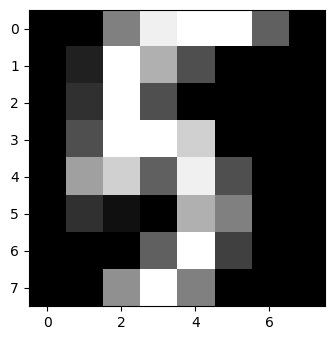

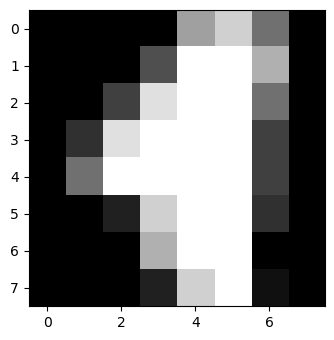

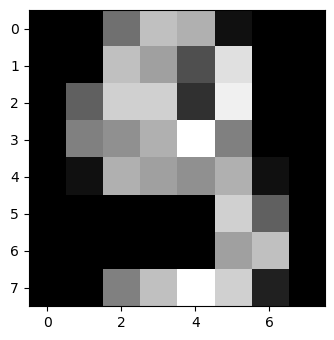

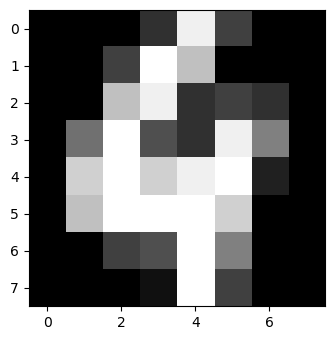

In [11]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
    plt.imshow(mnist.images[i], cmap='gray')
    plt.show()

# 2.0 Model data using Keras sequential neural networks

Split data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

Create a unique log directory name (to store logs for later analysis using tensorboard)

## 2.1 Wide Network

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model_wide = keras.models.Sequential()
model_wide.add(keras.layers.Input(64))
model_wide.add(keras.layers.Dense(256, activation="relu"))
model_wide.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 19,210
Trainable params: 19,210
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_wide.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [16]:
history = model_wide.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
 1/45 [..............................] - ETA: 5s - loss: 6.9414 - accuracy: 0.2188

2023-04-11 15:27:07.006224: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


45/45 [==============================] - 0s 3ms/step - loss: 1.5086 - accuracy: 0.7251 - val_loss: 0.2379 - val_accuracy: 0.9194
Epoch 2/50
45/45 [==============================] - 0s 902us/step - loss: 0.2189 - accuracy: 0.9339 - val_loss: 0.1917 - val_accuracy: 0.9417
Epoch 3/50
45/45 [==============================] - 0s 831us/step - loss: 0.1438 - accuracy: 0.9624 - val_loss: 0.1483 - val_accuracy: 0.9528
Epoch 4/50
45/45 [==============================] - 0s 825us/step - loss: 0.1129 - accuracy: 0.9680 - val_loss: 0.1241 - val_accuracy: 0.9694
Epoch 5/50
45/45 [==============================] - 0s 815us/step - loss: 0.0964 - accuracy: 0.9756 - val_loss: 0.1163 - val_accuracy: 0.9694
Epoch 6/50
45/45 [==============================] - 0s 784us/step - loss: 0.0739 - accuracy: 0.9868 - val_loss: 0.1034 - val_accuracy: 0.9722
Epoch 7/50
45/45 [==============================] - 0s 795us/step - loss: 0.0643 - accuracy: 0.9868 - val_loss: 0.1010 - val_accuracy: 0.9750
Epoch 8/50
45/45 [=

In [17]:
loss, accuracy = model_wide.evaluate(X_test, y_test)

12/12 [==============================] - 0s 516us/step - loss: 0.0682 - accuracy: 0.9750


In [18]:
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

Loss 0.06816
Accuracy 0.9750


In [19]:
model_wide.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 19,210
Trainable params: 19,210
Non-trainable params: 0
_________________________________________________________________


In [20]:
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]


12/12 [==============================] - 0s 428us/step


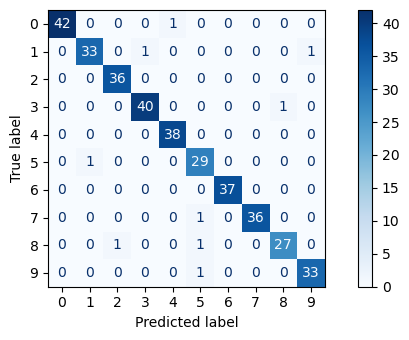

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     0.9706    0.9429    0.9565        35
           2     0.9730    1.0000    0.9863        36
           3     0.9756    0.9756    0.9756        41
           4     0.9744    1.0000    0.9870        38
           5     0.9062    0.9667    0.9355        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9730    0.9863        37
           8     0.9643    0.9310    0.9474        29
           9     0.9706    0.9706    0.9706        34

    accuracy                         0.9750       360
   macro avg     0.9735    0.9736    0.9733       360
weighted avg     0.9755    0.9750    0.9750       360



## 2.2 Deep Network

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model_deep = keras.models.Sequential()
model_deep.add(keras.layers.Input(64))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(10, activation="softmax"))

We can also create this network using the syntax below...

In [25]:
input_ = keras.layers.Input(64)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
output = keras.layers.Dense(10, activation="softmax")(hidden4)
model_deep = keras.Model(inputs=[input_], outputs=[output])

In [26]:
model_deep.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
history = model_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
45/45 [==============================] - 0s 2ms/step - loss: 1.0852 - accuracy: 0.6848 - val_loss: 0.4058 - val_accuracy: 0.9000
Epoch 2/50
45/45 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.9047 - val_loss: 0.2361 - val_accuracy: 0.9306
Epoch 3/50
45/45 [==============================] - 0s 999us/step - loss: 0.2128 - accuracy: 0.9429 - val_loss: 0.1629 - val_accuracy: 0.9528
Epoch 4/50
45/45 [==============================] - 0s 983us/step - loss: 0.1448 - accuracy: 0.9631 - val_loss: 0.1458 - val_accuracy: 0.9528
Epoch 5/50
45/45 [==============================] - 0s 968us/step - loss: 0.1241 - accuracy: 0.9694 - val_loss: 0.1100 - val_accuracy: 0.9722
Epoch 6/50
45/45 [==============================] - 0s 999us/step - loss: 0.0913 - accuracy: 0.9791 - val_loss: 0.0910 - val_accuracy: 0.9778
Epoch 7/50
45/45 [==============================] - 0s 988us/step - loss: 0.0785 - accuracy: 0.9812 - val_loss: 0.1220 - val_accuracy: 0.9667
Epoch 8/50

In [28]:
loss, accuracy = model_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

12/12 [==============================] - 0s 526us/step - loss: 0.0587 - accuracy: 0.9778
Loss 0.05867
Accuracy 0.9778


In [29]:
model_deep.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,146
Trainable params: 59,146
Non-trainable p

[(0, 43), (1, 35), (2, 36), (3, 41), (4, 38), (5, 30), (6, 37), (7, 37), (8, 29), (9, 34)]
12/12 [==============================] - 0s 511us/step


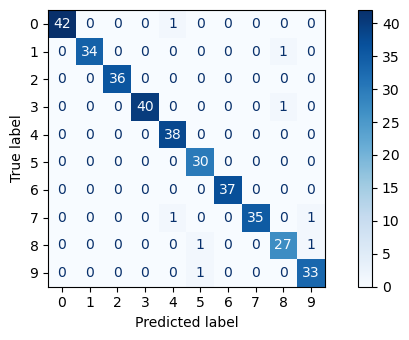

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

# display the confusion matrix
y_pred = model_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     1.0000    0.9714    0.9855        35
           2     1.0000    1.0000    1.0000        36
           3     1.0000    0.9756    0.9877        41
           4     0.9500    1.0000    0.9744        38
           5     0.9375    1.0000    0.9677        30
           6     1.0000    1.0000    1.0000        37
           7     1.0000    0.9459    0.9722        37
           8     0.9310    0.9310    0.9310        29
           9     0.9429    0.9706    0.9565        34

    accuracy                         0.9778       360
   macro avg     0.9761    0.9771    0.9763       360
weighted avg     0.9786    0.9778    0.9779       360



## 2.3 Wide and Deep Network

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
input_ = keras.layers.Input(64)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(10, activation="softmax")(concat)
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

In [34]:
model_wide_deep.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [35]:
history = model_wide_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
45/45 [==============================] - 0s 2ms/step - loss: 1.8133 - accuracy: 0.6660 - val_loss: 0.2911 - val_accuracy: 0.9083
Epoch 2/50
45/45 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.9137 - val_loss: 0.2911 - val_accuracy: 0.9222
Epoch 3/50
45/45 [==============================] - 0s 984us/step - loss: 0.1797 - accuracy: 0.9415 - val_loss: 0.1535 - val_accuracy: 0.9389
Epoch 4/50
45/45 [==============================] - 0s 1ms/step - loss: 0.1298 - accuracy: 0.9596 - val_loss: 0.1445 - val_accuracy: 0.9556
Epoch 5/50
45/45 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9694 - val_loss: 0.1346 - val_accuracy: 0.9611
Epoch 6/50
45/45 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9784 - val_loss: 0.1286 - val_accuracy: 0.9639
Epoch 7/50
45/45 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9833 - val_loss: 0.1239 - val_accuracy: 0.9667
Epoch 8/50
45/45 [

In [36]:
loss, accuracy = model_wide_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

12/12 [==============================] - 0s 563us/step - loss: 0.0838 - accuracy: 0.9778
Loss 0.08377
Accuracy 0.9778


In [37]:
model_wide_deep.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 128)          8320        ['input_4[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 128)          16512       ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 128)          16512       ['dense_12[0][0]']               
                                                                                            

12/12 [==============================] - 0s 476us/step


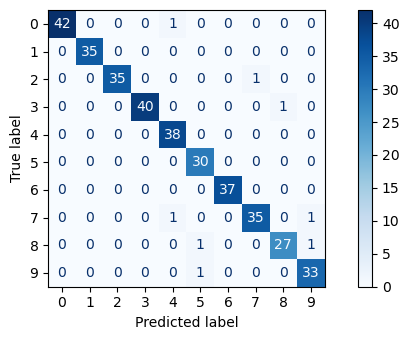

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9767    0.9882        43
           1     1.0000    1.0000    1.0000        35
           2     1.0000    0.9722    0.9859        36
           3     1.0000    0.9756    0.9877        41
           4     0.9500    1.0000    0.9744        38
           5     0.9375    1.0000    0.9677        30
           6     1.0000    1.0000    1.0000        37
           7     0.9722    0.9459    0.9589        37
           8     0.9643    0.9310    0.9474        29
           9     0.9429    0.9706    0.9565        34

    accuracy                         0.9778       360
   macro avg     0.9767    0.9772    0.9767       360
weighted avg     0.9784    0.9778    0.9778       360

